In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns
from IPython.display import display
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
dir_list = os.listdir('Data')
total_files=len(dir_list)
dir_list

['ASIANPAINT__EQ__NSE__NSE__MINUTE.csv', 'HDFCBANK__EQ__NSE__NSE__MINUTE.csv']

In [3]:
stock_market={}
company_names=[]
for i in range(len(dir_list)):
    name=dir_list[i].split('__')[0]
    company_names.append(name)
    stock_market[name]={'filepath':'Updated_Stock_market_data\\'+dir_list[i]}

In [4]:
stock_market

{'ASIANPAINT': {'filepath': 'Updated_Stock_market_data\\ASIANPAINT__EQ__NSE__NSE__MINUTE.csv'},
 'HDFCBANK': {'filepath': 'Updated_Stock_market_data\\HDFCBANK__EQ__NSE__NSE__MINUTE.csv'}}

In [5]:
for i in company_names:
    dp=pd.read_csv(stock_market[i]['filepath'])
    stock_market[i]['df']=dp

In [6]:
for i in company_names:
    print('Stock Data of',i)
    display(stock_market[i]['df'])

Stock Data of ASIANPAINT


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,early morning,892.55,893.10,891.05,893.00,7599.0,0.000000,893.000000
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,early morning,893.95,894.85,893.20,893.80,3384.0,0.089586,893.400000
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,early morning,893.40,893.95,893.00,893.20,2638.0,-0.067129,893.333333
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,early morning,892.25,893.20,891.75,892.50,103839.0,-0.078370,893.125000
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,early morning,893.00,893.65,892.70,893.50,1696.0,0.112045,893.200000
...,...,...,...,...,...,...,...,...,...,...,...
370540,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,afternoon,2771.90,2772.95,2765.80,2769.70,5254.0,-0.081170,1450.327072
370541,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,afternoon,2768.70,2771.95,2768.65,2770.95,1889.0,0.045131,1450.330636
370542,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,afternoon,2769.95,2770.00,2769.00,2770.00,2439.0,-0.034284,1450.334197
370543,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,afternoon,2770.00,2770.40,2769.10,2770.00,2346.0,0.000000,1450.337759


Stock Data of HDFCBANK


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,early morning,605.00,605.00,601.00,601.45,7033.0,0.000000,601.450000
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,early morning,601.45,602.35,601.45,602.00,3026.0,0.091446,601.725000
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,early morning,601.95,602.35,599.25,599.25,4129.0,-0.456811,600.900000
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,early morning,599.25,600.35,599.00,600.35,687.0,0.183563,600.762500
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,early morning,600.35,600.50,599.75,600.00,2221.0,-0.058299,600.610000
...,...,...,...,...,...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,afternoon,1424.35,1425.30,1423.00,1424.00,14369.0,-0.087704,1026.191456
370542,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,afternoon,1423.95,1424.40,1421.65,1423.00,35256.0,-0.070225,1026.192527
370543,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,afternoon,1423.00,1423.00,1422.10,1422.80,14269.0,-0.014055,1026.193597
370544,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,afternoon,1422.80,1422.90,1421.50,1421.50,25494.0,-0.091369,1026.194664


In [7]:
print('Stock Market Data information')
for i in company_names:
    print('Company:',i)
    print(stock_market[i]['df'].info())
    print()

Stock Market Data information
Company: ASIANPAINT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370545 non-null  object 
 1   date       370545 non-null  object 
 2   time       370545 non-null  object 
 3   quater     370545 non-null  object 
 4   open       370407 non-null  float64
 5   high       370407 non-null  float64
 6   low        370407 non-null  float64
 7   close      370407 non-null  float64
 8   volume     370407 non-null  float64
 9   %change    370398 non-null  float64
 10  MA         370545 non-null  float64
dtypes: float64(7), object(4)
memory usage: 31.1+ MB
None

Company: HDFCBANK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370546 entries, 0 to 370545
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  370546 non-null  obj

In [8]:
for i in company_names:
    stock_market[i]['df']['timestamp'] = pd.to_datetime(stock_market[i]['df']['timestamp'],format='%Y-%m-%d %H:%M:%S%z')
    stock_market[i]['df']['date']=pd.to_datetime(stock_market[i]['df']['date'])
    stock_market[i]['df']['time'] = pd.to_datetime(stock_market[i]['df']['time'],format='%H:%M:%S').dt.time
    #stock_market[i]['df']['quater']=stock_market[i]['df']['quater'].astype('string')

In [9]:
print('Stock Market Data information')
for i in company_names:
    print('Company:',i)
    print(stock_market[i]['df'].info())
    print()

Stock Market Data information
Company: ASIANPAINT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370545 entries, 0 to 370544
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype                                
---  ------     --------------   -----                                
 0   timestamp  370545 non-null  datetime64[ns, pytz.FixedOffset(330)]
 1   date       370545 non-null  datetime64[ns]                       
 2   time       370545 non-null  object                               
 3   quater     370545 non-null  object                               
 4   open       370407 non-null  float64                              
 5   high       370407 non-null  float64                              
 6   low        370407 non-null  float64                              
 7   close      370407 non-null  float64                              
 8   volume     370407 non-null  float64                              
 9   %change    370398 non-null  float64                  

In [10]:
print('Stock Market Data Description')
for i in company_names:
    print('Company:',i)
    print(stock_market[i]['df'].describe())
    print()

Stock Market Data Description
Company: ASIANPAINT
                open           high            low          close  \
count  370407.000000  370407.000000  370407.000000  370407.000000   
mean     1450.395211    1451.098381    1449.654451    1450.388201   
std       346.320260     346.544786     346.093261     346.324015   
min       884.950000     885.750000     882.850000     884.950000   
25%      1161.000000    1161.500000    1160.500000    1161.000000   
50%      1378.650000    1379.350000    1378.000000    1378.650000   
75%      1712.600000    1713.650000    1711.600000    1712.600000   
max      2790.950000    2791.700000    2790.000000    2790.950000   

              volume        %change             MA  
count  370407.000000  370398.000000  370545.000000  
mean     3752.495838       0.000340    1195.790975  
std      7661.466604       0.092362     126.986048  
min         0.000000      -7.794033     889.297934  
25%       830.000000      -0.032630    1109.508075  
50%      1

In [11]:
print('Stock Market Data Null Check')
for i in company_names:
    print('Company:',i)
    print(stock_market[i]['df'].isnull().sum())
    print()

Stock Market Data Null Check
Company: ASIANPAINT
timestamp      0
date           0
time           0
quater         0
open         138
high         138
low          138
close        138
volume       138
%change      147
MA             0
dtype: int64

Company: HDFCBANK
timestamp      0
date           0
time           0
quater         0
open         141
high         141
low          141
close        141
volume       141
%change      151
MA             0
dtype: int64



In [12]:
print('Stock Market Data Null Values')
for i in company_names:
    print('Company:',i)
    display(stock_market[i]['df'][stock_market[i]['df'].isna().any(axis=1)])

Stock Market Data Null Values
Company: ASIANPAINT


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
239459,2019-08-02 13:59:00+05:30,2019-08-02,13:59:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1236.091379
239460,2019-08-02 14:00:00+05:30,2019-08-02,14:00:00,afternoon,1536.70,1536.7,1536.30,1536.30,2165.0,NaN,1236.092633
250317,2019-09-18 13:42:00+05:30,2019-09-18,13:42:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1250.340598
250318,2019-09-18 13:43:00+05:30,2019-09-18,13:43:00,afternoon,1557.10,1558.0,1556.70,1557.90,3559.0,NaN,1250.341827
251535,2019-09-23 15:15:00+05:30,2019-09-23,15:15:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1252.267003
...,...,...,...,...,...,...,...,...,...,...,...
337678,2020-08-27 12:28:00+05:30,2020-08-27,12:28:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1377.242774
337679,2020-08-27 12:29:00+05:30,2020-08-27,12:29:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1377.242774
337680,2020-08-27 12:30:00+05:30,2020-08-27,12:30:00,afternoon,1992.05,1992.1,1990.30,1990.55,11833.0,NaN,1377.244591
355092,2020-11-02 15:12:00+05:30,2020-11-02,15:12:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1409.639388


Company: HDFCBANK


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA
215836,2019-05-06 14:01:00+05:30,2019-05-06,14:01:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,932.799932
215837,2019-05-06 14:02:00+05:30,2019-05-06,14:02:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,932.799932
215838,2019-05-06 14:03:00+05:30,2019-05-06,14:03:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,932.799932
215839,2019-05-06 14:04:00+05:30,2019-05-06,14:04:00,afternoon,1165.30,1165.30,1164.95,1164.95,7923.0,NaN,932.801008
239459,2019-08-02 13:59:00+05:30,2019-08-02,13:59:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,958.384774
...,...,...,...,...,...,...,...,...,...,...,...
337679,2020-08-27 12:28:00+05:30,2020-08-27,12:28:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1004.062446
337680,2020-08-27 12:29:00+05:30,2020-08-27,12:29:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1004.062446
337681,2020-08-27 12:30:00+05:30,2020-08-27,12:30:00,afternoon,1118.65,1119.10,1118.65,1118.80,66174.0,NaN,1004.062786
355093,2020-11-02 15:12:00+05:30,2020-11-02,15:12:00,afternoon,NaN,NaN,NaN,NaN,NaN,NaN,1010.588632


In [13]:
#Cleaning NULL Values of open,High,low,close
for name in company_names:
    for i in stock_market[name]['df'].index:
        if math.isnan(stock_market[name]['df'].loc[i,'open']):
            j=i-1
            while(j>0 and math.isnan(stock_market[name]['df'].loc[j,'open'])==True):
                j-=1
            stock_market[name]['df'].loc[i,'open']=stock_market[name]['df'].loc[j,'open']
        if math.isnan(stock_market[name]['df'].loc[i,'close']):
            j=i-1
            while(j>0 and math.isnan(stock_market[name]['df'].loc[j,'close'])==True):
                j-=1
            stock_market[name]['df'].loc[i,'close']=stock_market[name]['df'].loc[j,'close']
        if math.isnan(stock_market[name]['df'].loc[i,'high']):
            j=i-1
            while(j>0 and math.isnan(stock_market[name]['df'].loc[j,'high'])==True):
                j-=1
            stock_market[name]['df'].loc[i,'high']=stock_market[name]['df'].loc[j,'high']
        if math.isnan(stock_market[name]['df'].loc[i,'low']):
            j=i-1
            while(j>0 and math.isnan(stock_market[name]['df'].loc[j,'low'])==True):
                j-=1
            stock_market[name]['df'].loc[i,'low']=stock_market[name]['df'].loc[j,'low']        

In [14]:
#Cleaning of Volume
for i in company_names:
    stock_market[i]['df']['volume'].fillna(0,inplace=True)

In [15]:
#Cleaning NULL of %Change
#%Change=(curr_close-prev_close)/prev_close*100
#Recalculate change for NULL values
for name in company_names:
    for i in stock_market[name]['df'].index:
        if math.isnan(stock_market[name]['df'].loc[i,'%change']):
            stock_market[name]['df'].loc[i,'%change']=(stock_market[name]['df'].loc[i,'close']-stock_market[name]['df'].loc[i-1,'close'])/stock_market[name]['df'].loc[i-1,'close']*100       

In [16]:
print('Stock Market Data Null Check')
for i in company_names:
    print('Company:',i)
    print(stock_market[i]['df'].isnull().sum())
    print()

Stock Market Data Null Check
Company: ASIANPAINT
timestamp    0
date         0
time         0
quater       0
open         0
high         0
low          0
close        0
volume       0
%change      0
MA           0
dtype: int64

Company: HDFCBANK
timestamp    0
date         0
time         0
quater       0
open         0
high         0
low          0
close        0
volume       0
%change      0
MA           0
dtype: int64



In [68]:
for i in company_names:
    stock_market[i]['df']['change']=stock_market[i]['df']['close']-stock_market[i]['df']['open']

In [69]:
for i in company_names:
    print("Company Name:",i)
    display(stock_market[i]['df'])

Company Name: ASIANPAINT


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,1,892.55,893.10,891.05,893.00,7599.0,0.000000,893.000000,1483328700,0.45
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,1,893.95,894.85,893.20,893.80,3384.0,0.089586,893.400000,1483328760,-0.15
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,1,893.40,893.95,893.00,893.20,2638.0,-0.067129,893.333333,1483328820,-0.20
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,1,892.25,893.20,891.75,892.50,103839.0,-0.078370,893.125000,1483328880,0.25
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,1,893.00,893.65,892.70,893.50,1696.0,0.112045,893.200000,1483328940,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370540,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,3,2771.90,2772.95,2765.80,2769.70,5254.0,-0.081170,1450.327072,1609494900,-2.20
370541,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,3,2768.70,2771.95,2768.65,2770.95,1889.0,0.045131,1450.330636,1609494960,2.25
370542,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,3,2769.95,2770.00,2769.00,2770.00,2439.0,-0.034284,1450.334197,1609495020,0.05
370543,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,3,2770.00,2770.40,2769.10,2770.00,2346.0,0.000000,1450.337759,1609495080,0.00


Company Name: HDFCBANK


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
0,2017-01-02 09:15:00+05:30,2017-01-02,09:15:00,1,605.00,605.00,601.00,601.45,7033.0,0.000000,601.450000,1483328700,-3.55
1,2017-01-02 09:16:00+05:30,2017-01-02,09:16:00,1,601.45,602.35,601.45,602.00,3026.0,0.091446,601.725000,1483328760,0.55
2,2017-01-02 09:17:00+05:30,2017-01-02,09:17:00,1,601.95,602.35,599.25,599.25,4129.0,-0.456811,600.900000,1483328820,-2.70
3,2017-01-02 09:18:00+05:30,2017-01-02,09:18:00,1,599.25,600.35,599.00,600.35,687.0,0.183563,600.762500,1483328880,1.10
4,2017-01-02 09:19:00+05:30,2017-01-02,09:19:00,1,600.35,600.50,599.75,600.00,2221.0,-0.058299,600.610000,1483328940,-0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370541,2021-01-01 15:25:00+05:30,2021-01-01,15:25:00,3,1424.35,1425.30,1423.00,1424.00,14369.0,-0.087704,1026.191456,1609494900,-0.35
370542,2021-01-01 15:26:00+05:30,2021-01-01,15:26:00,3,1423.95,1424.40,1421.65,1423.00,35256.0,-0.070225,1026.192527,1609494960,-0.95
370543,2021-01-01 15:27:00+05:30,2021-01-01,15:27:00,3,1423.00,1423.00,1422.10,1422.80,14269.0,-0.014055,1026.193597,1609495020,-0.20
370544,2021-01-01 15:28:00+05:30,2021-01-01,15:28:00,3,1422.80,1422.90,1421.50,1421.50,25494.0,-0.091369,1026.194664,1609495080,-1.30


In [70]:
for i in company_names:
    print("Company",i,"is having maximum change",stock_market[i]['df']['change'].max())
    print("Company",i,"is having Minimum change",stock_market[i]['df']['change'].min())
    stock_market[i]['max']=stock_market[i]['df']['change'].max()
    stock_market[i]['min']=stock_market[i]['df']['change'].min()

Company ASIANPAINT is having maximum change 68.45000000000005
Company ASIANPAINT is having Minimum change -51.09999999999991
Company HDFCBANK is having maximum change 49.69999999999993
Company HDFCBANK is having Minimum change -44.399999999999864


In [71]:
for i in company_names:
    stock_market[i]['df1']=stock_market[i]['df'][stock_market[i]['df'].change==stock_market[i]['max']]
    stock_market[i]['df2']=stock_market[i]['df'][stock_market[i]['df'].change==stock_market[i]['min']]

In [56]:
for i in company_names:
    print("Company Name:",i)
    print("MAX ROWS")
    display(stock_market[i]['df1'])
    print("Min ROWS")
    display(stock_market[i]['df2'])
    print()

Company Name: ASIANPAINT
MAX ROWS


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
298110,2020-03-25 09:15:00+05:30,2020-03-25,09:15:00,1,1446.55,1531.75,1446.0,1515.0,37121.0,-1.367188,1334.692856,1585107900,68.45


Min ROWS


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
295110,2020-03-13 09:15:00+05:30,2020-03-13,09:15:00,1,1785.0,1785.0,1732.5,1733.9,38529.0,-6.42489,1331.627537,1584071100,-51.1



Company Name: HDFCBANK
MAX ROWS


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
295176,2020-03-13 10:21:00+05:30,2020-03-13,10:21:00,1,919.2,970.0,919.2,968.9,2701584.0,1.989474,1006.42808,1584075060,49.7


Min ROWS


,timestamp,date,time,quater,open,high,low,close,volume,%change,MA,int_timestamp,change
251176,2019-09-23 09:16:00+05:30,2019-09-23,09:16:00,1,1280.55,1281.75,1236.15,1236.15,574664.0,-3.463491,965.667141,1569210360,-44.4


In [57]:
print("Average Change")
for i in company_names:
    stock_market[i]['mean']=stock_market[i]['df']['change'].mean()
    print("Company",i,"is having average change btw close and open is",stock_market[i]['mean'])

Average Change
Company ASIANPAINT is having average change btw close and open is -0.0073193539246246666
Company HDFCBANK is having average change btw close and open is -0.006442519957036525


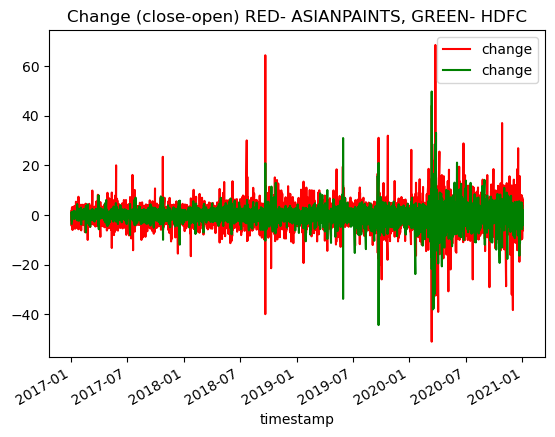

In [62]:
fig, ax = plt.subplots()

stock_market['ASIANPAINT']['df'].plot(x='timestamp',y='change',color='red',ax=ax)
stock_market['HDFCBANK']['df'].plot(x='timestamp',y='change',color='green',ax=ax)

plt.title('Change (close-open) RED- ASIANPAINTS, GREEN- HDFC')
plt.show()

In [66]:
if stock_market['ASIANPAINT']['mean']>stock_market['HDFCBANK']['mean']:
    print("HDFC has Minimum change in Open and close with mean of",stock_market['ASIANPAINT']['mean'])
else:
    print("ASIANPAINT has Minimum change in Open and close with mean of",stock_market['HDFCBANK']['mean'])

ASIANPAINT has Minimum change in Open and close with mean of -0.006442519957036525


In [67]:
if stock_market['ASIANPAINT']['mean']<stock_market['HDFCBANK']['mean']:
    print("HDFC has MAX change in Open and close with mean of",stock_market['ASIANPAINT']['mean'])
else:
    print("ASIANPAINT has MAX change in Open and close with mean of",stock_market['HDFCBANK']['mean'])

HDFC has MAX change in Open and close with mean of -0.0073193539246246666
